<a href="https://colab.research.google.com/github/Kartik77/CIFAR-10/blob/master/VGGmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
tranform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
    ])

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=tranform_train)
#testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=tranform_test)

Files already downloaded and verified


In [0]:
num_classes = 10

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [0]:
def imshow(img, title):
  npimg = img.numpy() / 2 +0.5
  plt.figure(figsize = (batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

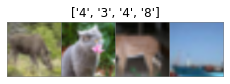

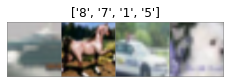

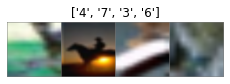

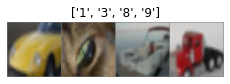

In [13]:
for i in range(4):
  show_batch_images(trainloader)

In [0]:
from torchvision import models

In [0]:
vgg = models.vgg16_bn()

In [16]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [17]:
print(vgg.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [18]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [19]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [20]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#Train CIFAR10


In [0]:
#testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=tranform_test)

In [0]:
batch_size=16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
#testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader, model):
  total, correct = 0,0
  for data in dataloader:
    inputs,labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred= torch.max(outputs.data, 1)
    total+= labels.size(0)
    correct += (pred==labels).sum().item()

  return 100* correct/ total

In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

In [25]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs,labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters,loss.item()))

  loss_epoch_arr.append(loss.item())
  print('Epoch : %d/%d, Train acc: %0.2f'% (epoch, max_epochs, evaluation(trainloader,vgg)))

plt.plot(loss_epoch_arr)
plt.show()

Iteration: 0/3125, Loss: 2.87


KeyboardInterrupt: ignored

#Freeze Layers 

In [26]:
vgg = models.vgg16_bn(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [27]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [28]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
for param in vgg.parameters():
  param.requires_grad= False

In [0]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [31]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [0]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.27
Iteration: 100/3125, Loss: 1.98
Iteration: 200/3125, Loss: 0.89
Iteration: 300/3125, Loss: 1.84
Iteration: 400/3125, Loss: 1.67
Iteration: 500/3125, Loss: 2.44
Iteration: 600/3125, Loss: 1.66
Iteration: 700/3125, Loss: 2.16
Iteration: 800/3125, Loss: 1.36
Iteration: 900/3125, Loss: 2.17
Iteration: 1000/3125, Loss: 2.37
Iteration: 1100/3125, Loss: 2.10
Iteration: 1200/3125, Loss: 1.65
Iteration: 1300/3125, Loss: 2.47
Iteration: 1400/3125, Loss: 2.44
Iteration: 1500/3125, Loss: 2.10
Iteration: 1600/3125, Loss: 2.04
Iteration: 1700/3125, Loss: 1.51
Iteration: 1800/3125, Loss: 3.18
Iteration: 1900/3125, Loss: 2.44
Iteration: 2000/3125, Loss: 2.35
Iteration: 2100/3125, Loss: 2.06
Iteration: 2200/3125, Loss: 1.66
Iteration: 2300/3125, Loss: 2.12
Iteration: 2400/3125, Loss: 2.94
Iteration: 2500/3125, Loss: 2.34
Iteration: 2600/3125, Loss: 1.17
Iteration: 2700/3125, Loss: 4.03
Iteration: 2800/3125, Loss: 2.13
Iteration: 2900/3125, Loss: 1.58
Iteration: 3000/3125, 

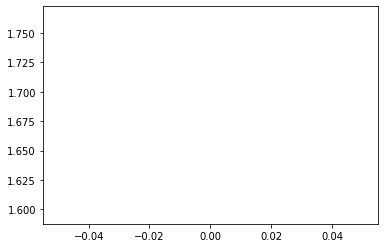

In [33]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs,labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters,loss.item()))

  loss_epoch_arr.append(loss.item())
  print('Epoch : %d/%d, Train acc: %0.2f'% (epoch, max_epochs, evaluation(trainloader,vgg)))

plt.plot(loss_epoch_arr)
plt.show()

#Model Copies

In [0]:
import copy

In [36]:
loss_epoch_arr = []
max_epochs = 1
min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data
    inputs,labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss> loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(vgg.state_dict())
      print('Min Loss %0.2f'% min_loss)
    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters,loss.item()))

  loss_epoch_arr.append(loss.item())


Min Loss 1.24
Iteration: 0/3125, Loss: 1.24
Min Loss 1.18
Min Loss 0.85
Iteration: 100/3125, Loss: 2.83
Iteration: 200/3125, Loss: 1.46
Iteration: 300/3125, Loss: 2.14
Min Loss 0.80
Min Loss 0.71
Iteration: 400/3125, Loss: 1.36
Iteration: 500/3125, Loss: 2.56
Iteration: 600/3125, Loss: 3.49
Iteration: 700/3125, Loss: 2.36
Iteration: 800/3125, Loss: 2.06
Min Loss 0.54
Iteration: 900/3125, Loss: 2.95
Iteration: 1000/3125, Loss: 2.40
Iteration: 1100/3125, Loss: 2.21
Iteration: 1200/3125, Loss: 2.14
Iteration: 1300/3125, Loss: 2.02
Iteration: 1400/3125, Loss: 2.31
Iteration: 1500/3125, Loss: 2.64
Iteration: 1600/3125, Loss: 3.12
Iteration: 1700/3125, Loss: 2.32
Iteration: 1800/3125, Loss: 1.47
Min Loss 0.52
Iteration: 1900/3125, Loss: 1.60
Iteration: 2000/3125, Loss: 1.96
Iteration: 2100/3125, Loss: 2.14
Iteration: 2200/3125, Loss: 1.46
Iteration: 2300/3125, Loss: 3.75
Iteration: 2400/3125, Loss: 2.38
Iteration: 2500/3125, Loss: 2.47
Iteration: 2600/3125, Loss: 2.96
Iteration: 2700/3125, L

In [37]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg))

43.986
